In [4]:
import pandas as pd
import time
import matplotlib.pyplot as plt

from textblob import TextBlob


In [8]:
file = "./data/temp/2019_27_zyYgDtY2AMY.csv"
df = pd.read_csv(file)
df['timestamp'] = df['timestamp'].apply(lambda x : x[:19])
df['datetime'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%dT%H:%M:%S")
df['Year-Month'] = df['datetime'].apply(lambda x: "{:d}-{:02d}".format(x.year, x.month))
df.sort_values('datetime')

# Sentiment extraction
df['Sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['isPos'] = df['Sentiment'].apply(lambda x: x > 0.2)
df['isNeg'] = df['Sentiment'].apply(lambda x: x < -0.2)

In [21]:
df.set_index("datetime")[['isPos', 'isNeg']].iloc[1000:]

,isPos,isNeg
datetime,,
2019-07-20 12:43:21,False,False
2019-07-20 12:17:01,False,False
2019-07-20 09:18:34,False,False
2019-07-20 05:54:51,True,False
2019-07-20 05:52:46,False,False
...,...,...
2019-06-03 00:45:02,False,False
2019-06-03 00:44:59,True,False
2019-06-03 00:44:58,True,False


In [10]:
df[['isPos', 'isNeg']]

,isPos,isNeg
0,False,False
1,True,False
2,True,False
3,False,True
4,False,False
...,...,...
4563,False,False
4564,True,False
4565,True,False
4566,False,False


In [23]:
df_agg = df.groupby(['Year-Month']).agg({
                "datetime": "first",
                "text": "count",
                "isPos": "sum",
                "isNeg": "sum",
            })
df_agg['pos_ratio'] = df_agg['isPos'] / df_agg['text']
df_agg['neg_ratio'] = df_agg['isNeg'] / df_agg['text']

In [25]:
df_agg.set_index("datetime")[['isPos', 'isNeg']]

,isPos,isNeg
datetime,,
2019-06-30 23:01:05,1002.0,145.0
2019-07-31 04:11:37,66.0,6.0
2019-08-31 22:32:38,29.0,6.0
2019-09-29 19:05:41,61.0,8.0
2019-10-31 18:57:47,34.0,7.0
2019-11-30 23:27:17,109.0,10.0
2019-12-31 01:56:22,41.0,2.0
2020-01-31 14:15:21,33.0,4.0
2020-02-29 08:17:09,30.0,4.0


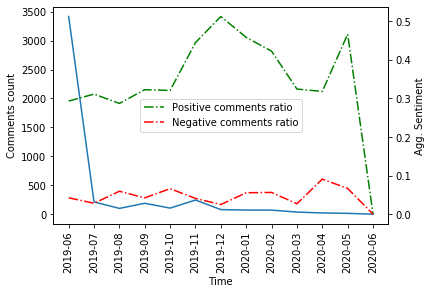

In [26]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time')
ax1.set_ylabel('Comments count')
ax1.plot(df_agg.index, df_agg.text)
ax1.tick_params(axis='y')
ax1.set_xticklabels(df_agg.index, rotation = 'vertical')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Agg. Sentiment')  # we already handled the x-label with ax1
ax2.plot(df_agg.index, df_agg.pos_ratio, 'g-.')
ax2.plot(df_agg.index, df_agg.neg_ratio, 'r-.')
ax2.tick_params(axis='y')
ax2.legend(['Positive comments ratio', 'Negative comments ratio'])
